In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
warnings.filterwarnings('ignore')

sns.set()

drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/fakultet/colab/dataset.csv'

Mounted at /content/drive


In [2]:
raw_data = pd.read_csv(dataset)
raw_data.head()

,Brand,Model,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Tip,Registrovan,Godina,Gorivo
0,Fiat,Croma,3000.0,NaN,NaN,NaN,NaN,0,NaN,NaN
1,BMW,320,13700.0,188001.0,2.0,130.0,NaN,false,2008.0,Dizel
2,Mercedes-Benz,B 160,6300.0,4600643.0,2.7,160.0,NaN,true,2003.0,Dizel
3,Mercedes-Benz,C 220,29999.0,130000.0,2.2,125.0,Limuzina,true,2013.0,Dizel
4,Opel,Zafira,9000.0,300000.0,1.7,92.0,Monovolumen,true,2010.0,Dizel


In [3]:
raw_data['Registrovan'] = raw_data['Registrovan'].replace({'false': 0, 'true': 1})

Prilikom scrapping podataka, slucajno sam postavio polja u registrovan koloni na true i false umjesto True i False, pa cemo to sada ispraviti.

In [4]:
raw_data

,Brand,Model,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Tip,Registrovan,Godina,Gorivo
0,Fiat,Croma,3000.0,NaN,NaN,NaN,NaN,0,NaN,NaN
1,BMW,320,13700.0,188001.0,2.0,130.0,NaN,0,2008.0,Dizel
2,Mercedes-Benz,B 160,6300.0,4600643.0,2.7,160.0,NaN,1,2003.0,Dizel
3,Mercedes-Benz,C 220,29999.0,130000.0,2.2,125.0,Limuzina,1,2013.0,Dizel
4,Opel,Zafira,9000.0,300000.0,1.7,92.0,Monovolumen,1,2010.0,Dizel
...,...,...,...,...,...,...,...,...,...,...
13547,Peugeot,208,10500.0,218000.0,1.4,50.0,NaN,0,2012.0,Dizel
13548,Seat,Ibiza,3500.0,323000.0,1.9,81.0,Limuzina,1,2001.0,Dizel
13549,Audi,Q5,25000.0,270000.0,3.0,176.0,NaN,1,2010.0,Dizel
13550,Mercedes-Benz,GLC 250,58000.0,216000.0,2.2,150.0,Terenac,1,2016.0,Dizel


In [5]:
raw_data.describe(include='all')

,Brand,Model,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Tip,Registrovan,Godina,Gorivo
count,13552,13552,13552.000000,1.354300e+04,13543.000000,1.354200e+04,10135,13552,13543.000000,13543
unique,58,734,NaN,NaN,NaN,NaN,14,3,NaN,5
top,Volkswagen,Golf,NaN,NaN,NaN,NaN,Limuzina,0,NaN,Dizel
freq,3652,1451,NaN,NaN,NaN,NaN,4193,5391,NaN,11518
mean,NaN,NaN,23517.817296,3.668100e+05,1.908728,1.685964e+05,NaN,NaN,2011.362254,NaN
std,NaN,NaN,26770.529102,1.012863e+07,0.522142,1.910282e+07,NaN,NaN,6.364679,NaN
min,NaN,NaN,2.000000,0.000000e+00,0.600000,0.000000e+00,NaN,NaN,1956.000000,NaN
25%,NaN,NaN,9700.000000,1.630000e+05,1.600000,7.700000e+01,NaN,NaN,2009.000000,NaN
50%,NaN,NaN,16500.000000,2.234040e+05,1.900000,9.200000e+01,NaN,NaN,2011.000000,NaN
75%,NaN,NaN,28500.000000,2.690000e+05,2.000000,1.100000e+02,NaN,NaN,2016.000000,NaN


In [6]:
raw_data.duplicated().sum()

9

In [7]:
raw_data. drop_duplicates(inplace=True)
raw_data.duplicated().sum()

0

In [8]:
raw_data.isna().sum()

Brand                  0
Model                  0
Cijena                 0
Kilometraza            9
Zapremina_motora       9
Snaga_motora          10
Tip                 3416
Registrovan            0
Godina                 9
Gorivo                 9
dtype: int64

S obzirom da imamo veliki broj redova u kojima fale podaci, ne možemo ih samo ukloniti.
Za numeričke kolone, za vrijednosti koje fale postavljamo aritmetičke sredine tih kolona, dok za kategoričke kolone postavljamo najčešće vrijednosti odnosno moduse.


In [9]:
numeric_columns = ['Kilometraza', 'Zapremina_motora', 'Snaga_motora', 'Godina']

# Popunjavanje nedostajućih vrednosti sa srednjom vrednošću
for column in numeric_columns:
    mean_value = raw_data[column].mean()
    raw_data[column].fillna(mean_value, inplace=True)

# Kategorialne kolone koje ćemo popuniti sa najčešćom vrednošću
categorical_columns = ['Tip', 'Gorivo']

# Popunjavanje nedostajućih vrednosti sa najčešćom vrednošću
for column in categorical_columns:
    mode_value = raw_data[column].mode()[0]
    raw_data[column].fillna(mode_value, inplace=True)


In [10]:
raw_data.isna().sum()

Brand               0
Model               0
Cijena              0
Kilometraza         0
Zapremina_motora    0
Snaga_motora        0
Tip                 0
Registrovan         0
Godina              0
Gorivo              0
dtype: int64

In [11]:
raw_data.describe(include='all')

,Brand,Model,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Tip,Registrovan,Godina,Gorivo
count,13543,13543,13543.000000,1.354300e+04,13543.000000,1.354300e+04,13543,13543,13543.000000,13543
unique,58,734,NaN,NaN,NaN,NaN,14,3,NaN,5
top,Volkswagen,Golf,NaN,NaN,NaN,NaN,Limuzina,0,NaN,Dizel
freq,3650,1451,NaN,NaN,NaN,NaN,7607,5388,NaN,11518
mean,NaN,NaN,23515.156169,3.668827e+05,1.908549,1.687085e+05,NaN,NaN,2011.363086,NaN
std,NaN,NaN,26764.387111,1.012863e+07,0.521828,1.910212e+07,NaN,NaN,6.362736,NaN
min,NaN,NaN,2.000000,0.000000e+00,0.600000,0.000000e+00,NaN,NaN,1956.000000,NaN
25%,NaN,NaN,9725.000000,1.630000e+05,1.600000,7.700000e+01,NaN,NaN,2009.000000,NaN
50%,NaN,NaN,16500.000000,2.235000e+05,1.900000,9.200000e+01,NaN,NaN,2011.000000,NaN
75%,NaN,NaN,28500.000000,2.691240e+05,2.000000,1.140000e+02,NaN,NaN,2016.000000,NaN


In [12]:
raw_data.isnull().sum()

Brand               0
Model               0
Cijena              0
Kilometraza         0
Zapremina_motora    0
Snaga_motora        0
Tip                 0
Registrovan         0
Godina              0
Gorivo              0
dtype: int64

In [13]:
raw_data.head()

,Brand,Model,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Tip,Registrovan,Godina,Gorivo
0,Fiat,Croma,3000.0,3.668827e+05,1.908549,168708.479635,Limuzina,0,2011.363086,Dizel
1,BMW,320,13700.0,1.880010e+05,2.000000,130.000000,Limuzina,0,2008.000000,Dizel
2,Mercedes-Benz,B 160,6300.0,4.600643e+06,2.700000,160.000000,Limuzina,1,2003.000000,Dizel
3,Mercedes-Benz,C 220,29999.0,1.300000e+05,2.200000,125.000000,Limuzina,1,2013.000000,Dizel
4,Opel,Zafira,9000.0,3.000000e+05,1.700000,92.000000,Monovolumen,1,2010.000000,Dizel


In [14]:
raw_data.count()

Brand               13543
Model               13543
Cijena              13543
Kilometraza         13543
Zapremina_motora    13543
Snaga_motora        13543
Tip                 13543
Registrovan         13543
Godina              13543
Gorivo              13543
dtype: int64

<Axes: xlabel='Cijena', ylabel='Density'>

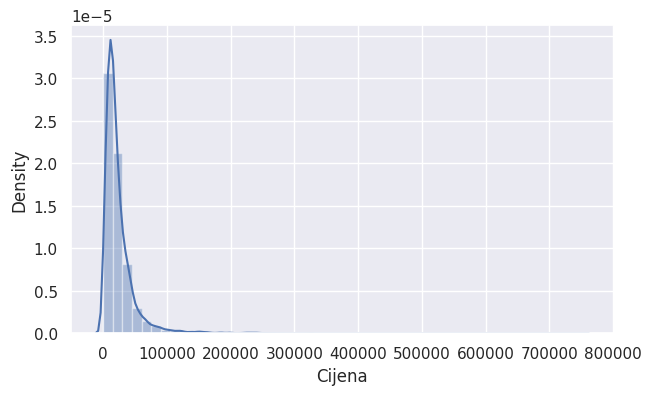

In [ ]:
plt.figure(figsize=(7,4))
sns.distplot(raw_data['Cijena'])

Ovdje cemo prvo ukloniti outliere za kolonu cijena, uzimamo vrijednosti vece od 99og kvantila

In [15]:
q = raw_data['Cijena'].quantile(q = 0.99)
q

132261.9999999997

In [16]:
cars_1 = raw_data[raw_data['Cijena'] < q]
cars_1.describe()

,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Godina
count,13407.000000,1.340700e+04,13407.00000,1.340700e+04,13407.000000
mean,21805.134034,3.699698e+05,1.89612,1.704171e+05,2011.272191
std,18950.955750,1.017983e+07,0.50253,1.919876e+07,6.323753
min,2.000000,0.000000e+00,0.60000,0.000000e+00,1956.000000
25%,9600.000000,1.650000e+05,1.60000,7.700000e+01,2009.000000
50%,16299.000000,2.250000e+05,1.90000,9.000000e+01,2011.000000
75%,27990.000000,2.700000e+05,2.00000,1.100000e+02,2016.000000
max,130000.000000,1.111111e+09,7.50000,2.222222e+09,2024.000000


Text(0.5, 1.0, 'With outliers')

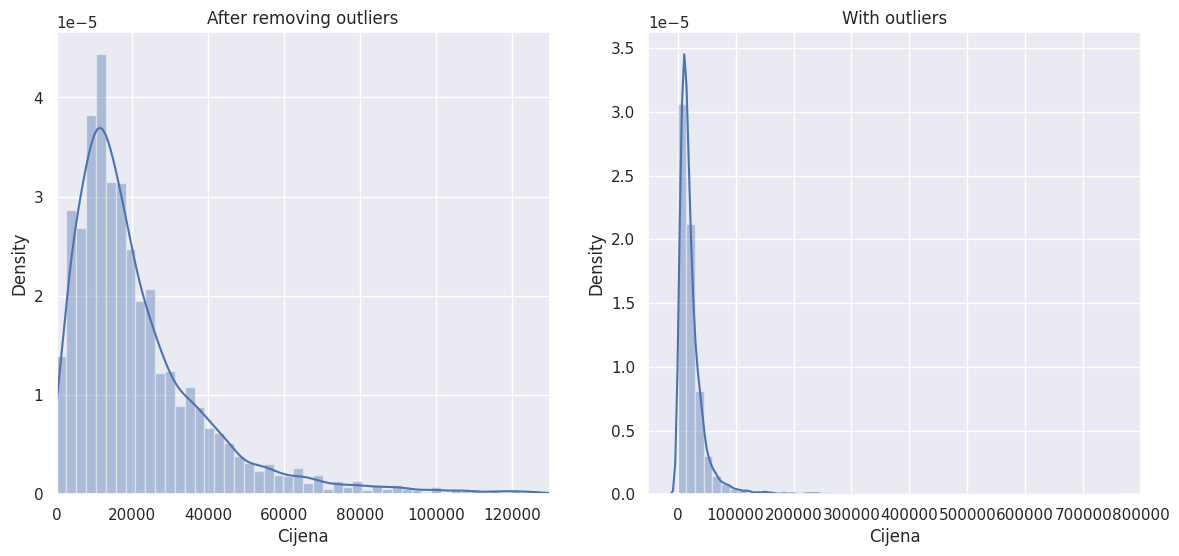

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(cars_1['Cijena'])
plt.title('After removing outliers')
plt.xlim(0, 130000.000000)

plt.subplot(1,2,2)
sns.distplot(raw_data['Cijena'])
plt.title('With outliers')


Text(0.5, 1.0, 'Year Distribution')

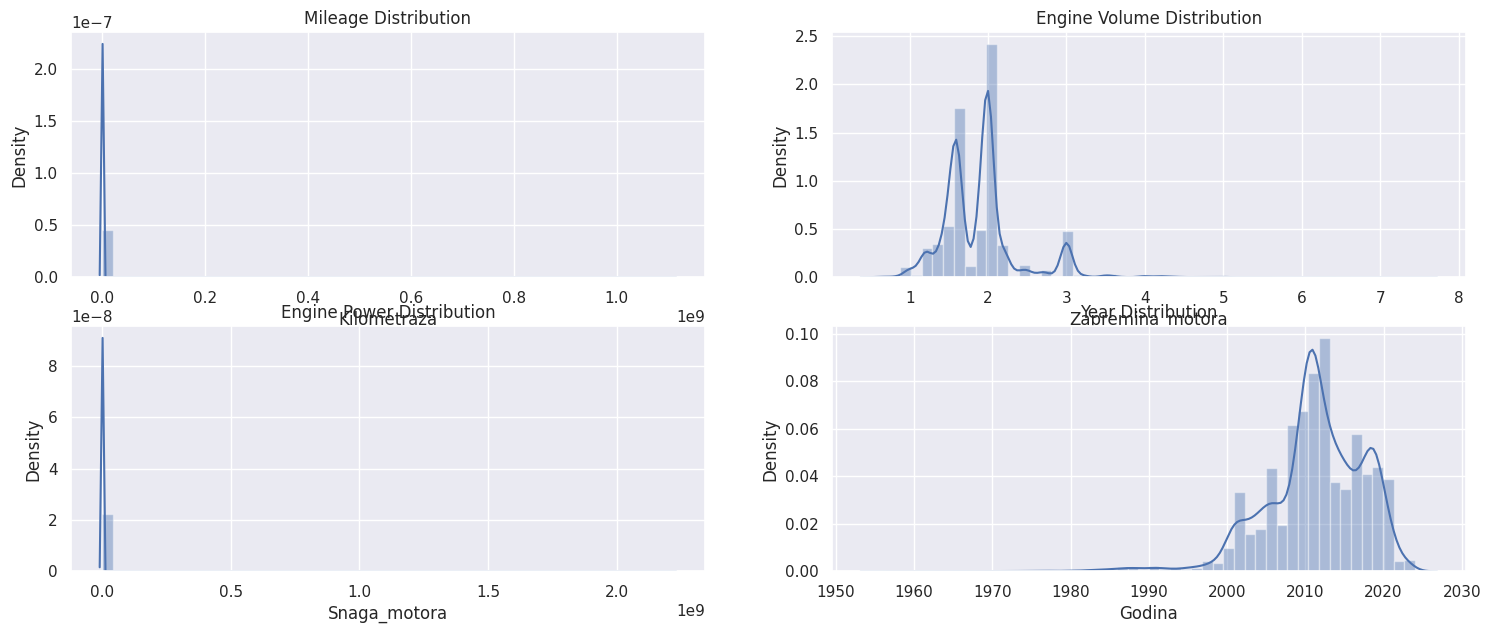

In [18]:
plt.figure(figsize=(18, 7))

plt.subplot(2, 2, 1)
sns.distplot(cars_1['Kilometraza'], kde=True)
plt.title('Mileage Distribution')

plt.subplot(2, 2, 2)
sns.distplot(cars_1['Zapremina_motora'], kde=True)
plt.title('Engine Volume Distribution')

plt.subplot(2, 2, 3)
sns.distplot(cars_1['Snaga_motora'], kde=True)
plt.title('Engine Power Distribution')

plt.subplot(2, 2, 4)
sns.distplot(cars_1['Godina'], kde=True)
plt.title('Year Distribution')


In [19]:
q = cars_1['Kilometraza'].quantile(0.99)
q

440000.0

In [20]:
cars_2 = cars_1[cars_1['Kilometraza']<q]
cars_2.describe()

,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Godina
count,13269.000000,13269.000000,13269.000000,1.326900e+04,13269.000000
mean,21948.873691,212525.870311,1.894037,1.721884e+05,2011.366137
std,18981.440341,83200.887790,0.500546,1.929833e+07,6.242145
min,2.000000,0.000000,0.600000,0.000000e+00,1956.000000
25%,9800.000000,164850.000000,1.600000,7.700000e+01,2009.000000
50%,16499.000000,223500.000000,1.900000,9.000000e+01,2011.000000
75%,28000.000000,267690.000000,2.000000,1.100000e+02,2016.000000
max,130000.000000,439341.000000,7.500000,2.222222e+09,2024.000000


Text(0.5, 1.0, 'With outliers')

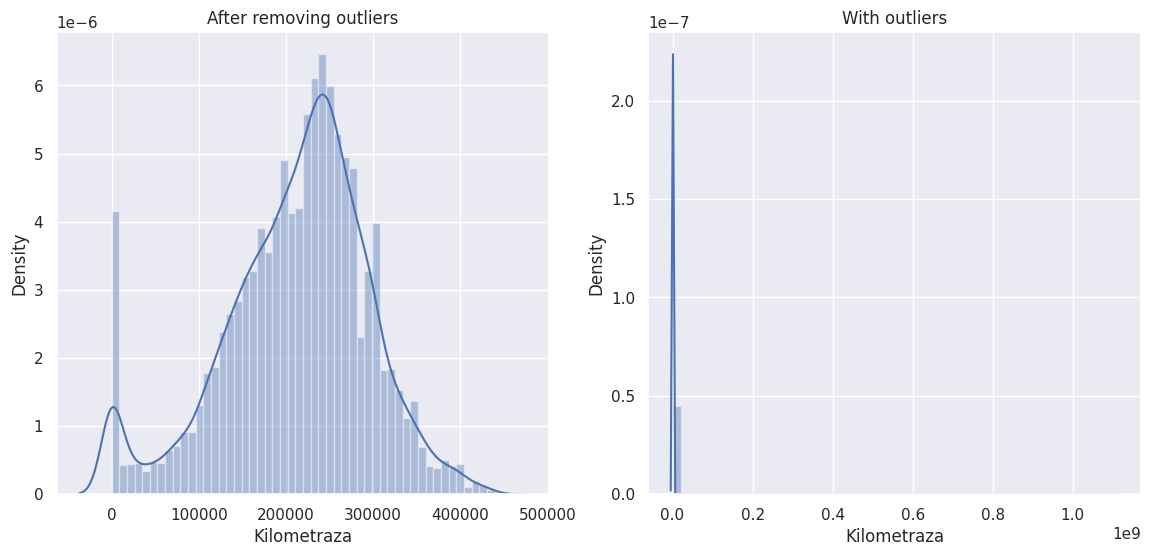

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(cars_2['Kilometraza'])
plt.title('After removing outliers')



plt.subplot(1,2,2)
sns.distplot(cars_1['Kilometraza'])
plt.title('With outliers')

In [22]:
cars_3 = cars_2[cars_2['Zapremina_motora']<6.0]

<Axes: xlabel='Zapremina_motora', ylabel='Density'>

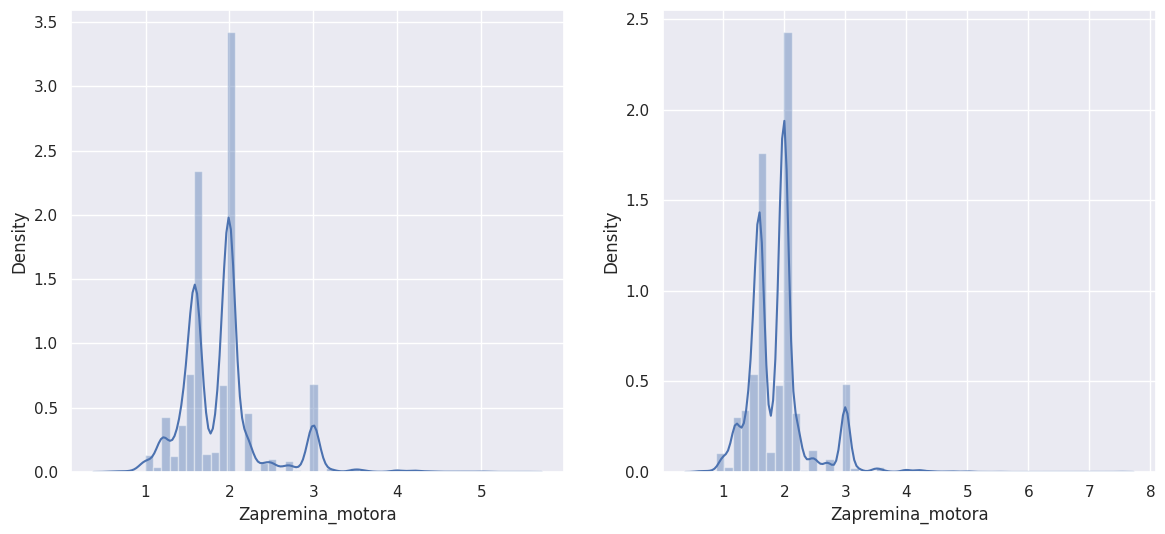

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(cars_3['Zapremina_motora'])




plt.subplot(1,2,2)
sns.distplot(cars_2['Zapremina_motora'])


In [24]:
q = cars_1['Snaga_motora'].quantile(0.99)
q

246.0

In [25]:
cars_4 = cars_3[cars_3['Snaga_motora'] < q]



<Axes: xlabel='Snaga_motora', ylabel='Density'>

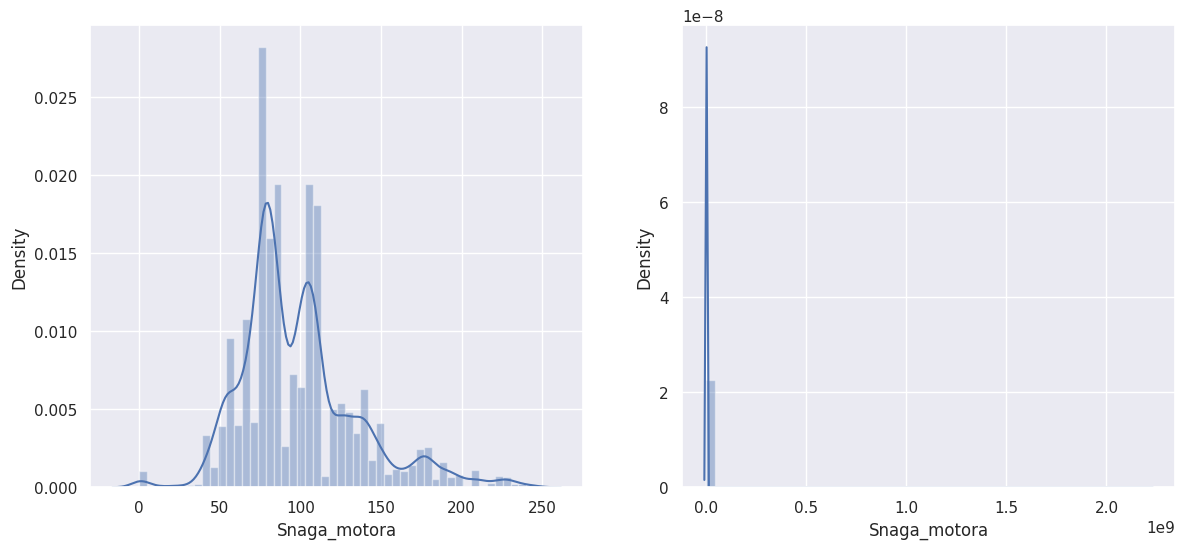

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(cars_4['Snaga_motora'])




plt.subplot(1,2,2)
sns.distplot(cars_3['Snaga_motora'])

In [27]:
q = cars_4['Godina'].quantile(0.01)
q

1991.0

In [28]:
cars_5 = cars_4[cars_4['Godina'] > q]

<Axes: xlabel='Godina', ylabel='Density'>

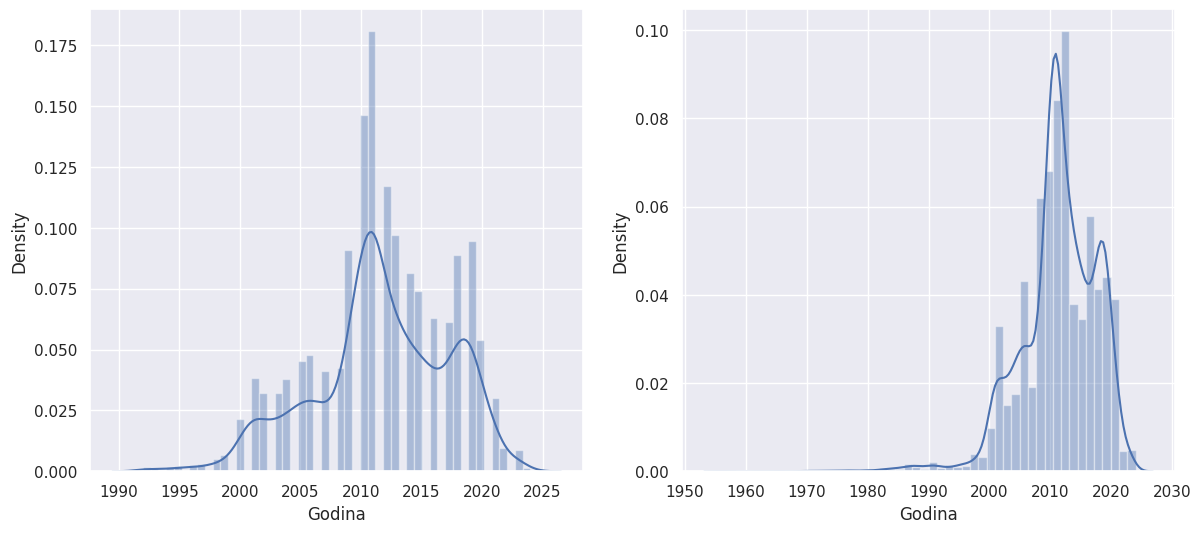

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(cars_5['Godina'])




plt.subplot(1,2,2)
sns.distplot(cars_4['Godina'])

In [30]:
clean_data = cars_5.reset_index(drop=True)
clean_data

,Brand,Model,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Tip,Registrovan,Godina,Gorivo
0,BMW,320,13700.0,188001.0,2.0,130.0,Limuzina,0,2008.0,Dizel
1,Mercedes-Benz,C 220,29999.0,130000.0,2.2,125.0,Limuzina,1,2013.0,Dizel
2,Opel,Zafira,9000.0,300000.0,1.7,92.0,Monovolumen,1,2010.0,Dizel
3,Škoda,Octavia,16100.0,287600.0,1.6,77.0,Limuzina,1,2013.0,Dizel
4,BMW,Z4,24999.0,145000.0,2.0,110.0,Kabriolet,0,2008.0,Benzin
...,...,...,...,...,...,...,...,...,...,...
12977,Peugeot,208,10500.0,218000.0,1.4,50.0,Limuzina,0,2012.0,Dizel
12978,Seat,Ibiza,3500.0,323000.0,1.9,81.0,Limuzina,1,2001.0,Dizel
12979,Audi,Q5,25000.0,270000.0,3.0,176.0,Limuzina,1,2010.0,Dizel
12980,Mercedes-Benz,GLC 250,58000.0,216000.0,2.2,150.0,Terenac,1,2016.0,Dizel


In [31]:
q = clean_data['Cijena'].quantile(0.001)
q
clean_data = clean_data[clean_data['Cijena'] > q]

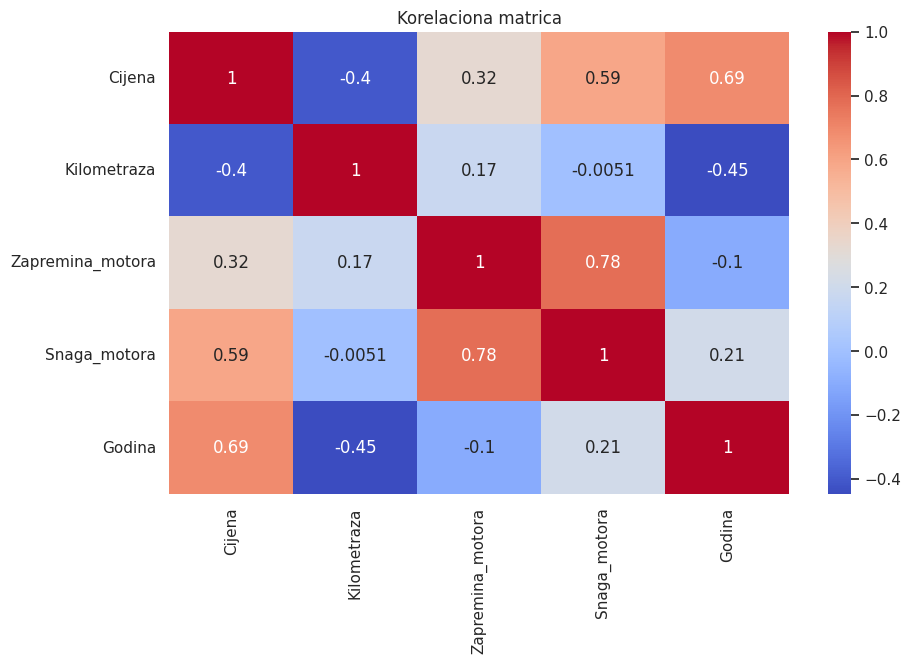

In [34]:

features = ['Cijena', 'Kilometraza', 'Zapremina_motora', 'Snaga_motora', 'Godina']
plt.figure(figsize=(10,6))
corr_matrix = clean_data[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelaciona matrica')
plt.show()

# **KILOMETRAŽA**
Dakle vidimo, kao što je i očekivano utjecaj kilometraže na cijenu je negativan i to -0.4, što označava da automobili sa većom kilometražom imaju manju cijenu.
Vidimo da kilometraža i zapremina motora imaju 0.17 što je slaba korelacija, tj. znači da zapremina motora ima blagi uticaj na kilometražu.
Godina ima -0.44 uticaj, štozapravo znači što je godina manja, da je kilometraža veća.

# **ZAPREMINA MOTORA**
Onoi što je bitno istaći za zapreminu motora je da iako nema jak uticaj na samu cijenu vidimo da ima jak uticaj na snagu motora što ima smisla, jer motori sa većom zapreminom proizvode i više snage.

# **SNAGA MOTORA I GODINA**
Dva feature koji imaju najjači uticaj na cijenu, zajedno sa kilometražom, što je i očekivano




In [ ]:
clean_data.describe(include='all')

,Brand,Model,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Tip,Registrovan,Godina,Gorivo
count,12966,12966,12966.000000,12966.000000,12966.000000,12966.000000,12966,12966,12966.000000,12966
unique,49,631,NaN,NaN,NaN,NaN,13,3,NaN,5
top,Volkswagen,Golf,NaN,NaN,NaN,NaN,Limuzina,true,NaN,Dizel
freq,3526,1385,NaN,NaN,NaN,NaN,7245,5135,NaN,11161
mean,NaN,NaN,21747.197131,213212.042433,1.882485,99.184706,NaN,NaN,2011.664507,NaN
std,NaN,NaN,18239.662196,82280.925461,0.463461,36.399668,NaN,NaN,5.556765,NaN
min,NaN,NaN,800.000000,0.000000,0.600000,0.000000,NaN,NaN,1992.000000,NaN
25%,NaN,NaN,9900.000000,165475.250000,1.600000,77.000000,NaN,NaN,2009.000000,NaN
50%,NaN,NaN,16500.000000,224000.000000,1.900000,90.000000,NaN,NaN,2012.000000,NaN
75%,NaN,NaN,27990.000000,267655.500000,2.000000,110.000000,NaN,NaN,2016.000000,NaN


In [35]:
raw_data.shape[0] - clean_data.shape[0]

577

In [36]:
clean_data.head()

,Brand,Model,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Tip,Registrovan,Godina,Gorivo
0,BMW,320,13700.0,188001.0,2.0,130.0,Limuzina,0,2008.0,Dizel
1,Mercedes-Benz,C 220,29999.0,130000.0,2.2,125.0,Limuzina,1,2013.0,Dizel
2,Opel,Zafira,9000.0,300000.0,1.7,92.0,Monovolumen,1,2010.0,Dizel
3,Škoda,Octavia,16100.0,287600.0,1.6,77.0,Limuzina,1,2013.0,Dizel
4,BMW,Z4,24999.0,145000.0,2.0,110.0,Kabriolet,0,2008.0,Benzin


In [37]:
prosjecna_starost = 2024 - clean_data['Godina'].mean()
print(f'Prosječna starost automobila: {prosjecna_starost:.2f} godina')

Prosječna starost automobila: 12.34 godina


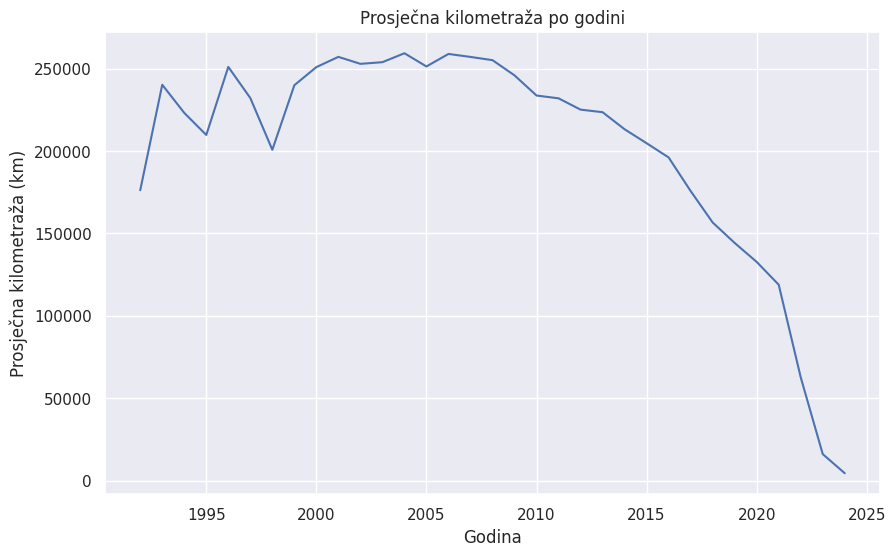

In [38]:
prosjek_kilometraze_po_godini = clean_data.groupby('Godina')['Kilometraza'].mean()
plt.figure(figsize=(10, 6))
prosjek_kilometraze_po_godini.plot()
plt.title('Prosječna kilometraža po godini')
plt.xlabel('Godina')
plt.ylabel('Prosječna kilometraža (km)')
plt.show()

In [39]:
najskuplji_auto = clean_data.loc[clean_data['Cijena'].idxmax()]
najjeftiniji_auto = clean_data.loc[clean_data['Cijena'].idxmin()]
print('Najskuplji automobil:')
print(najskuplji_auto)
print('Najjeftiniji automobil:')
print(najjeftiniji_auto)

Najskuplji automobil:
Brand                   Audi
Model                     Q8
Cijena              130000.0
Kilometraza          98500.0
Zapremina_motora         3.0
Snaga_motora           210.0
Tip                      SUV
Registrovan                0
Godina                2018.0
Gorivo                 Dizel
Name: 3135, dtype: object
Najjeftiniji automobil:
Brand                Peugeot
Model                    106
Cijena                 800.0
Kilometraza         250000.0
Zapremina_motora         1.1
Snaga_motora            37.0
Tip                 Limuzina
Registrovan                0
Godina                1999.0
Gorivo                Benzin
Name: 4197, dtype: object


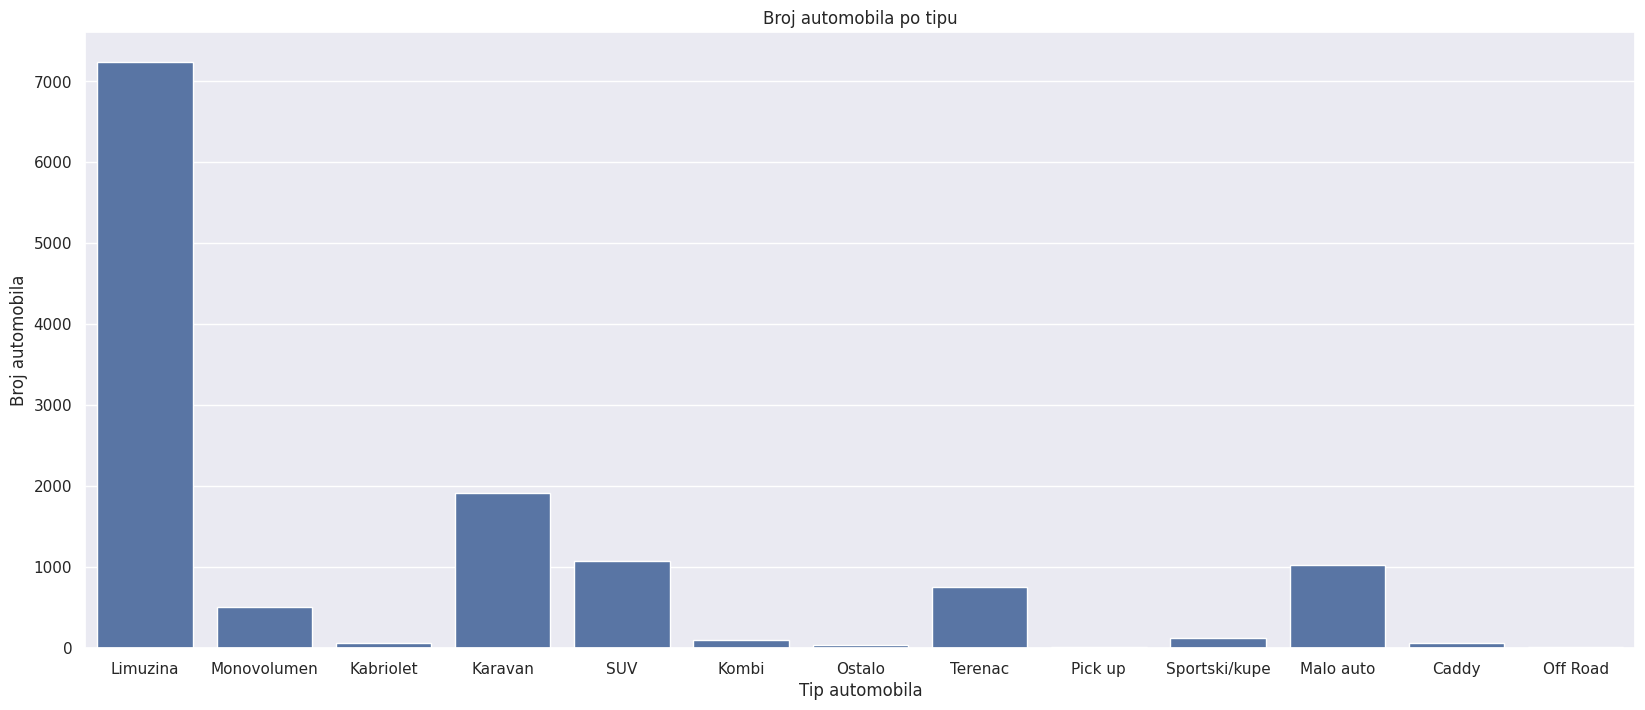

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=clean_data, x='Tip')
plt.title('Broj automobila po tipu')
plt.xlabel('Tip automobila')
plt.ylabel('Broj automobila')
plt.show()

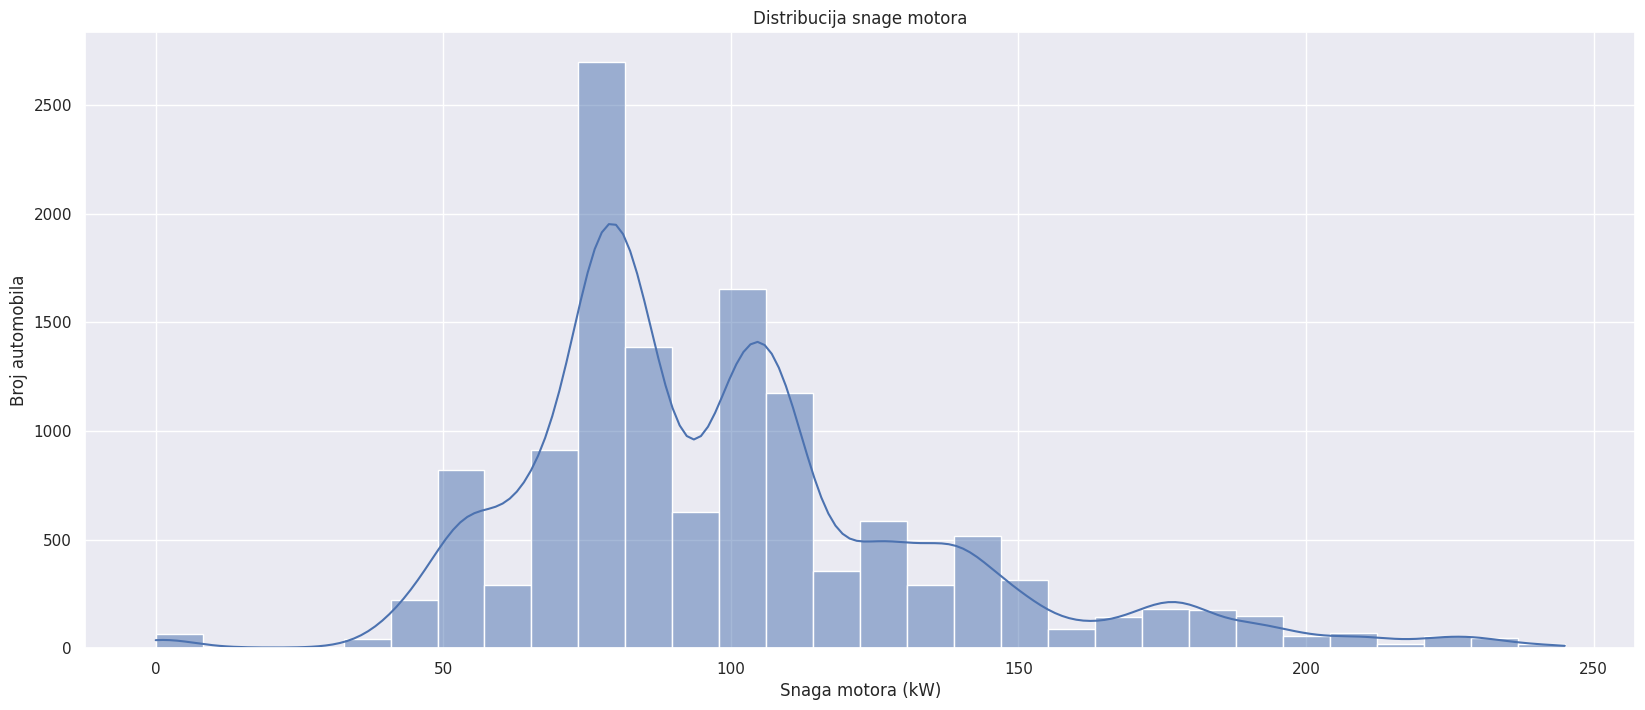

In [ ]:
plt.figure(figsize=(20, 8))
sns.histplot(clean_data['Snaga_motora'], bins=30, kde=True)
plt.title('Distribucija snage motora')
plt.xlabel('Snaga motora (kW)')
plt.ylabel('Broj automobila')
plt.show()

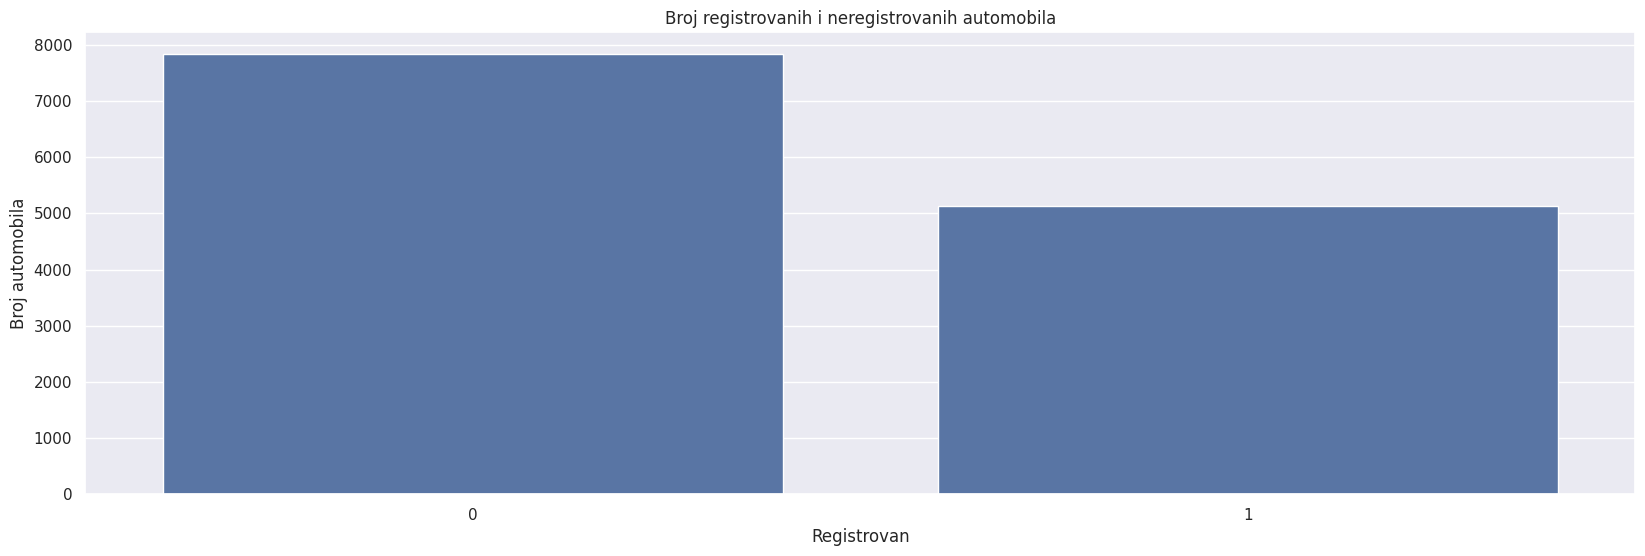

In [40]:
registracija_counts = clean_data['Registrovan'].value_counts()
plt.figure(figsize=(20, 6))
sns.countplot(data=clean_data, x='Registrovan')
plt.title('Broj registrovanih i neregistrovanih automobila')
plt.xlabel('Registrovan')
plt.ylabel('Broj automobila')
plt.show()

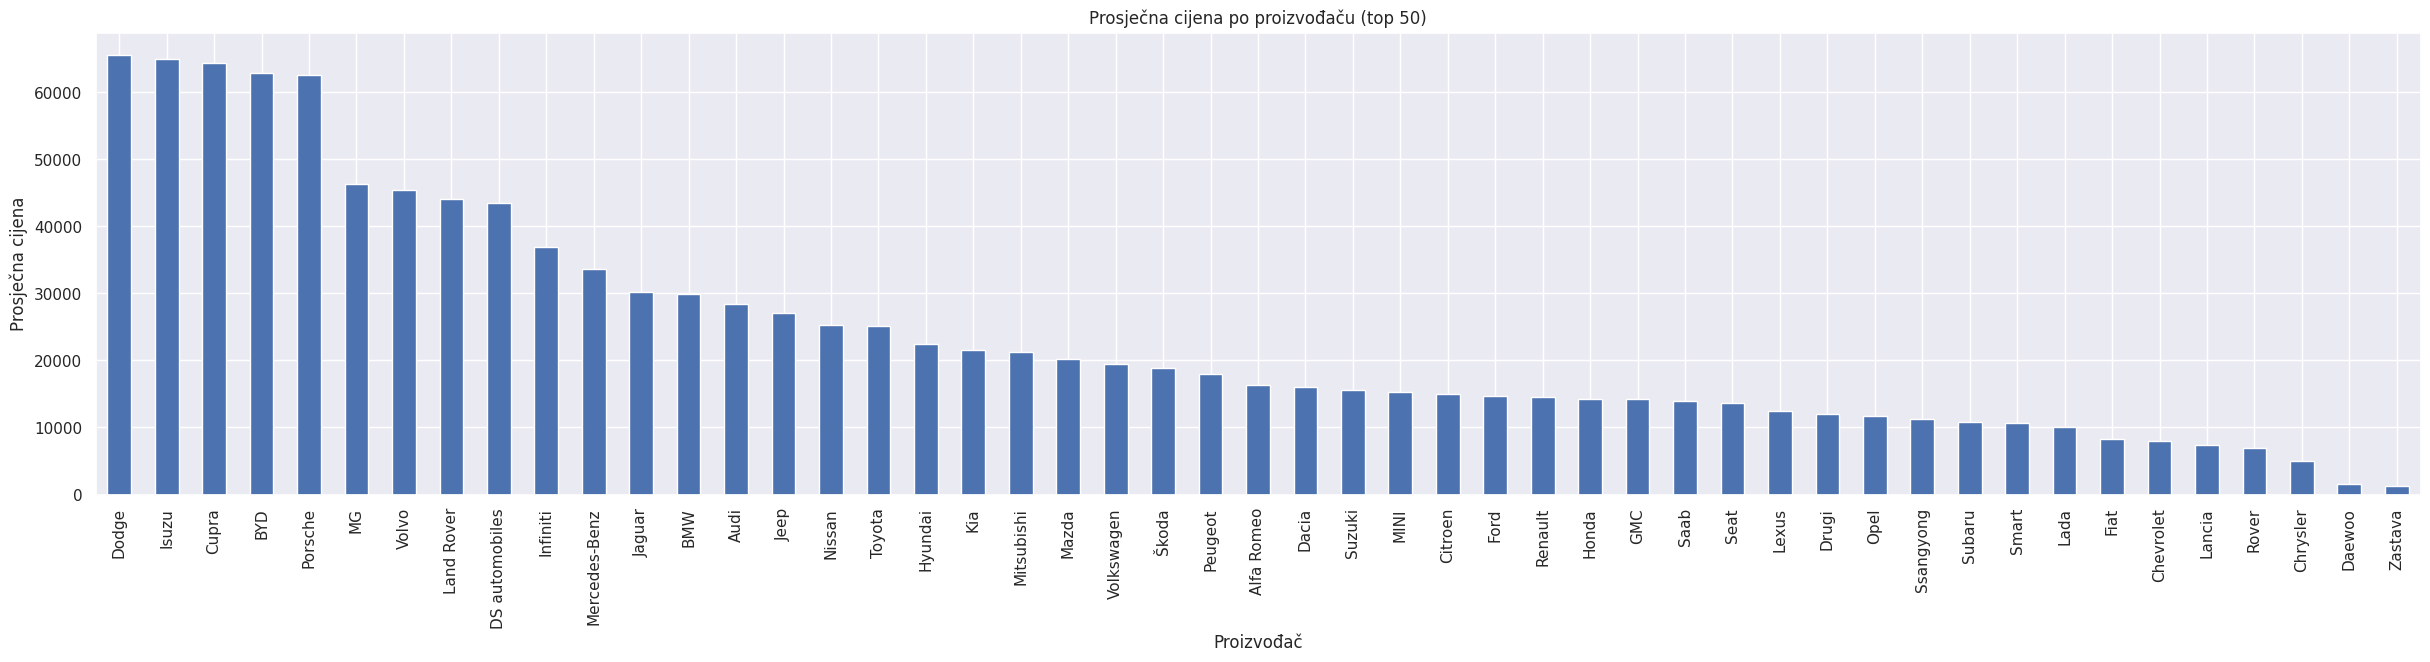

In [ ]:
prosjek_cijene_po_proizvodjacu = clean_data.groupby('Brand')['Cijena'].mean().sort_values(ascending=False)
plt.figure(figsize=(30, 6))
prosjek_cijene_po_proizvodjacu.head(50).plot(kind='bar')
plt.title('Prosječna cijena po proizvođaču (top 50)')
plt.xlabel('Proizvođač')
plt.ylabel('Prosječna cijena')
plt.show()

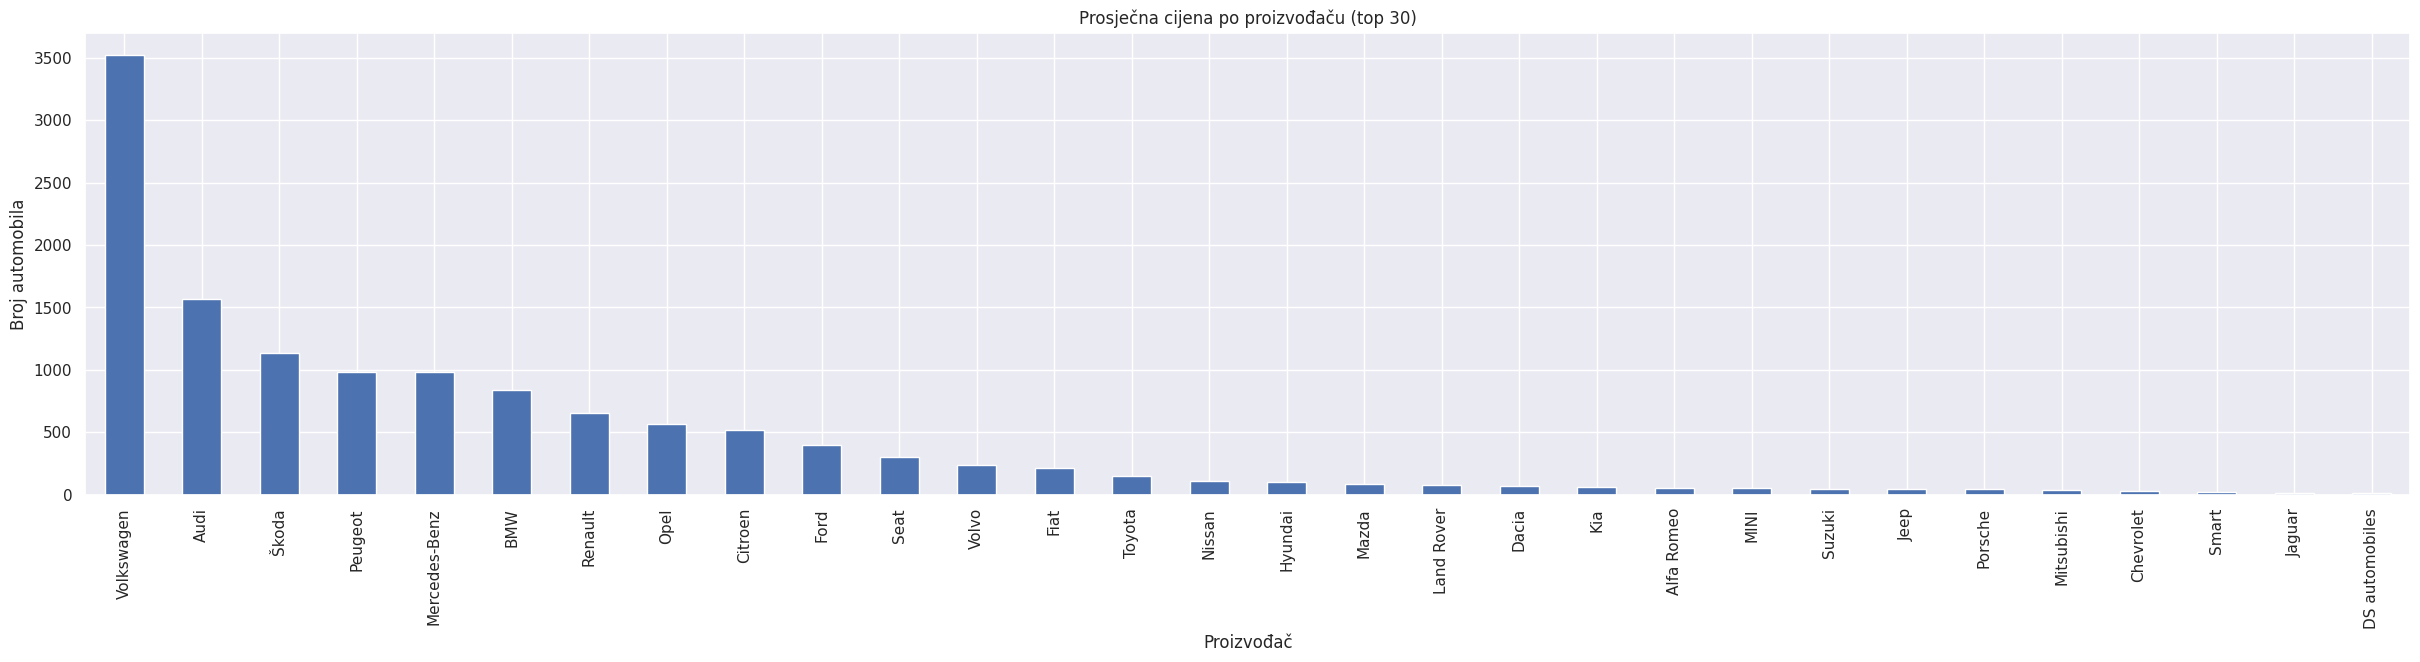

In [ ]:
broj_automobila_po_porizvodjacu = clean_data.groupby('Brand')['Cijena'].count().sort_values(ascending=False)
plt.figure(figsize=(30, 6))
broj_automobila_po_porizvodjacu.head(30).plot(kind='bar')
plt.title('Prosječna cijena po proizvođaču (top 30)')
plt.xlabel('Proizvođač')
plt.ylabel('Broj automobila')
plt.show()

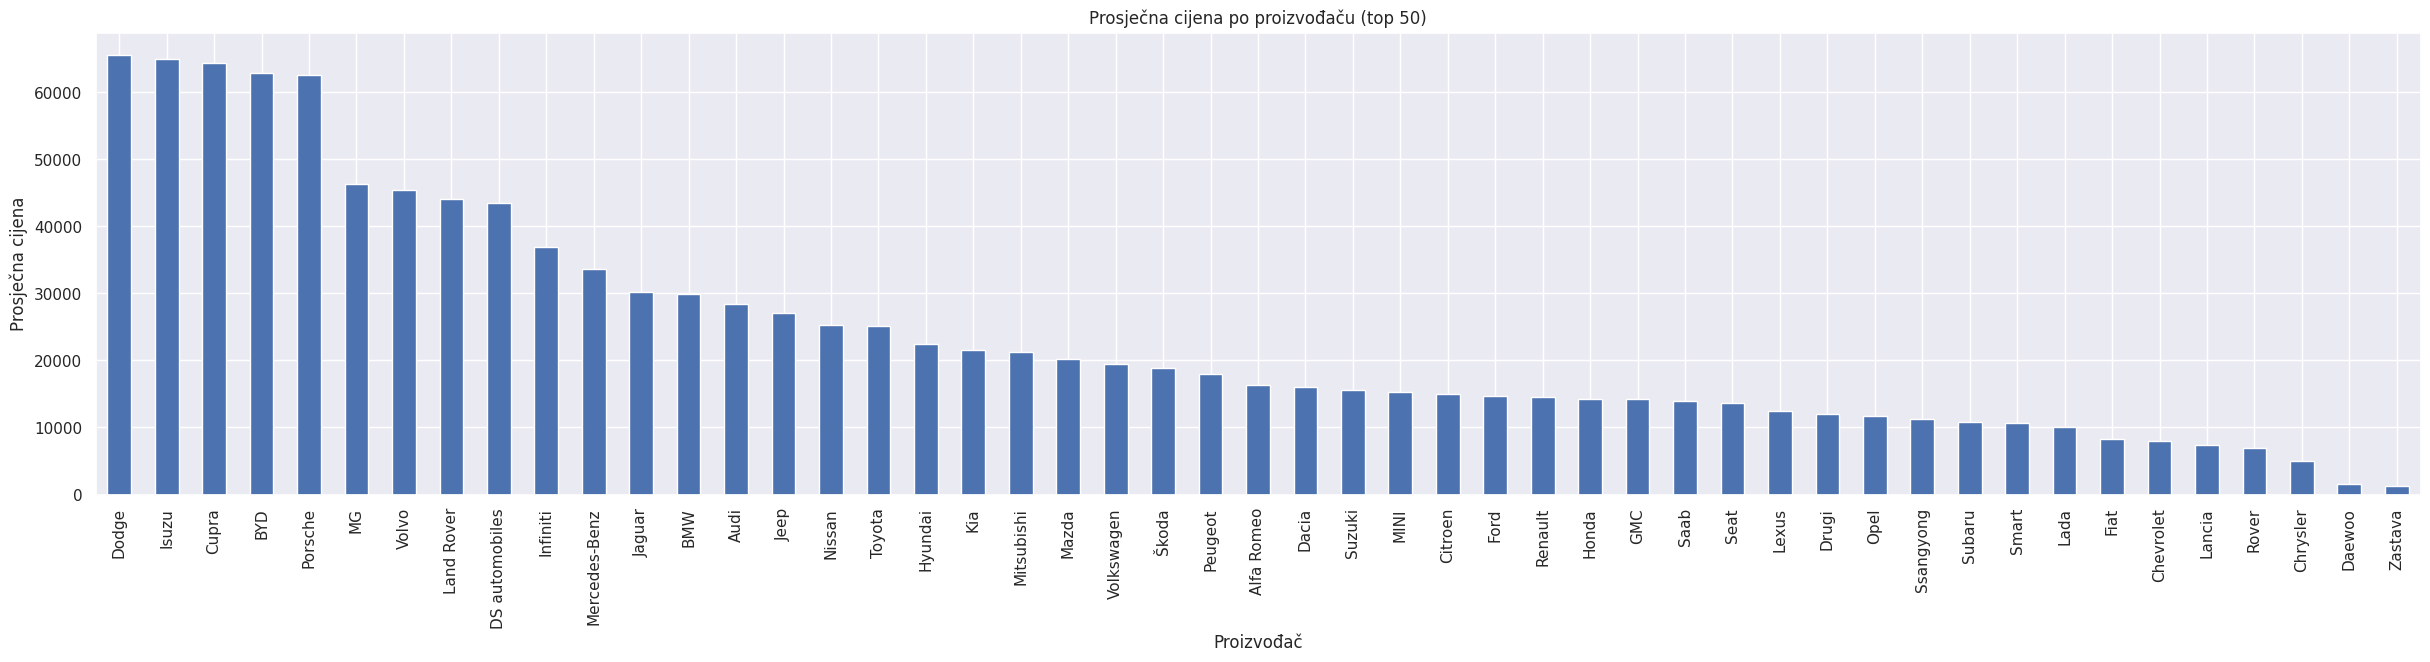

In [41]:
prosjek_cijene_po_proizvodjacu = clean_data.groupby('Brand')['Cijena'].mean().sort_values(ascending=False)
plt.figure(figsize=(30, 6))
prosjek_cijene_po_proizvodjacu.head(50).plot(kind='bar')
plt.title('Prosječna cijena po proizvođaču (top 50)')
plt.xlabel('Proizvođač')
plt.ylabel('Prosječna cijena')
plt.show()

In [42]:
brand_dict = dict()
model_dict =dict()
tip_dict = dict()
gorivo_dict = dict()

In [43]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

clean_data['Brand_enc'] = le.fit_transform(clean_data['Brand'])
for num, lbl in enumerate(le.classes_):
  brand_dict[lbl] = num


clean_data['Model_enc'] = le.fit_transform(clean_data['Model'])
for num, lbl in enumerate(le.classes_):
  model_dict[lbl] = num


clean_data['Tip_enc'] = le.fit_transform(clean_data['Tip'])
for num, lbl in enumerate(le.classes_):
  tip_dict[lbl] = num


clean_data['Gorivo_enc'] = le.fit_transform(clean_data['Gorivo'])
for num, lbl in enumerate(le.classes_):
  gorivo_dict[lbl] = num

clean_data.head()

,Brand,Model,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Tip,Registrovan,Godina,Gorivo,Brand_enc,Model_enc,Tip_enc,Gorivo_enc
0,BMW,320,13700.0,188001.0,2.0,130.0,Limuzina,0,2008.0,Dizel,2,36,4,1
1,Mercedes-Benz,C 220,29999.0,130000.0,2.2,125.0,Limuzina,1,2013.0,Dizel,30,148,4,1
2,Opel,Zafira,9000.0,300000.0,1.7,92.0,Monovolumen,1,2010.0,Dizel,33,617,6,1
3,Škoda,Octavia,16100.0,287600.0,1.6,77.0,Limuzina,1,2013.0,Dizel,48,425,4,1
4,BMW,Z4,24999.0,145000.0,2.0,110.0,Kabriolet,0,2008.0,Benzin,2,615,1,0


In [44]:
clean_data = clean_data.drop(['Brand', 'Tip', 'Gorivo', 'Model'], axis=1)

In [45]:
clean_data = clean_data.reset_index(drop=True)

In [46]:
clean_data

,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Registrovan,Godina,Brand_enc,Model_enc,Tip_enc,Gorivo_enc
0,13700.0,188001.0,2.0,130.0,0,2008.0,2,36,4,1
1,29999.0,130000.0,2.2,125.0,1,2013.0,30,148,4,1
2,9000.0,300000.0,1.7,92.0,1,2010.0,33,617,6,1
3,16100.0,287600.0,1.6,77.0,1,2013.0,48,425,4,1
4,24999.0,145000.0,2.0,110.0,0,2008.0,2,615,1,0
...,...,...,...,...,...,...,...,...,...,...
12961,10500.0,218000.0,1.4,50.0,0,2012.0,34,15,4,1
12962,3500.0,323000.0,1.9,81.0,1,2001.0,39,349,4,1
12963,25000.0,270000.0,3.0,176.0,1,2010.0,1,460,4,1
12964,58000.0,216000.0,2.2,150.0,1,2016.0,30,313,12,1


In [47]:
clean_data.to_csv('clean_data.csv', index=False)